In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## 图像读取

#### (1)单通道

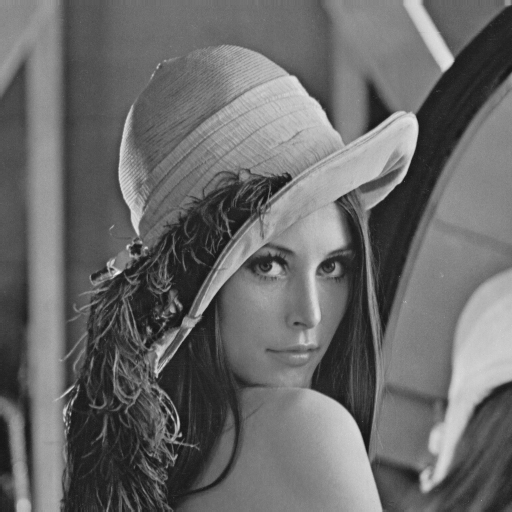

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512 at 0x1A4898C8400>


(512, 512)

In [4]:
img=Image.open('lena_gray.jpg')
display(img)
print(img)
img.size

In [6]:
img_np=np.asarray(img)
img_np.shape

(512, 512)

In [7]:
np.savetxt("lena_gray.txt",img_np,fmt='%4d')

#### (2)三通道

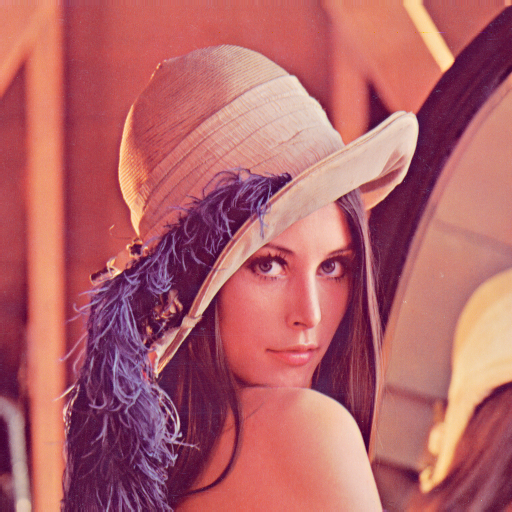

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x1A4898C8A58>


(512, 512)

In [9]:
img=Image.open('lena.jpg')
display(img)
print(img)
img.size

In [10]:
img_np=np.array(img)
img_np.shape

(512, 512, 3)

In [11]:
r,g,b=img.split()

In [16]:
r=img.getchannel(0)
g=img.getchannel(1)
b=img.getchannel(2)

(<PIL.Image.Image image mode=L size=512x512 at 0x1A4898C8F28>,
 <PIL.Image.Image image mode=L size=512x512 at 0x1A4898C8EF0>,
 <PIL.Image.Image image mode=L size=512x512 at 0x1A4898C8828>)

In [18]:
img=cv2.imread('lena.jpg')

In [20]:
b,g,r=cv2.split(img)

In [33]:
rgb_img=cv2.merge([b,g,r])

In [34]:
rgb_img=cv2.cvtColor(rgb_img,cv2.COLOR_BGR2RGB)

In [35]:
rgb_img

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [32]:
img

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

Text(0.5, 1.0, 'b')

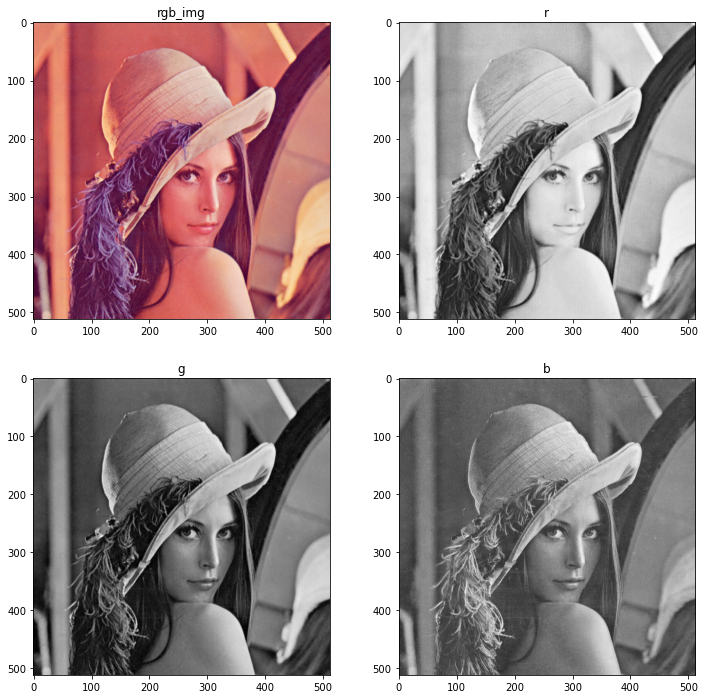

In [54]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(rgb_img,'gray')
# plt.imshow(rgb_img)
plt.title("rgb_img")

plt.subplot(222)
plt.imshow(r,'gray')
plt.title('r')

plt.subplot(223)
plt.imshow(g,'gray')
plt.title('g')

plt.subplot(224)
plt.imshow(b,'gray')
plt.title('b')

In [38]:
plt.imshow?

## 通道转换

In [48]:
img=cv2.imread('lena.jpg')
img.shape

(512, 512, 3)

In [49]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [50]:
img_gray.shape

(512, 512)

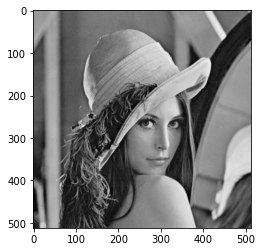

In [52]:
plt.imshow(img_gray,'gray')

## 图片拼接与缩放

(857, 1024, 3)

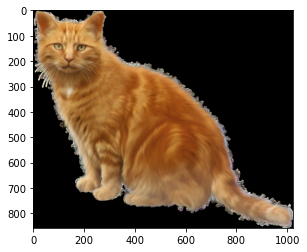

In [74]:
img=cv2.imread('cat.png',-1)
# row,col,channel=img.shape

#转化会丢失alpha通道
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
img.shape

In [76]:
img=cv2.imread('cat.png',-1)
b,g,r,alpha=cv2.split(img)
np.savetxt('alpha.txt',alpha,fmt="%.4lf")

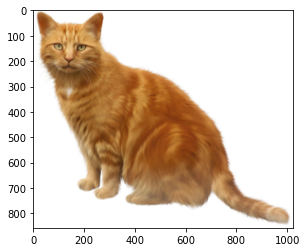

In [78]:
new_img=cv2.merge([r,g,b,alpha])
plt.imshow(new_img)

#### 分割

In [79]:
row,col,chan=new_img.shape

In [81]:
row,col,chan

(857, 1024, 4)

In [82]:
p1=new_img[:,:int(col/2),:]
p2=new_img[:,int(col/2):,:]

Text(0.5, 1.0, 'right')

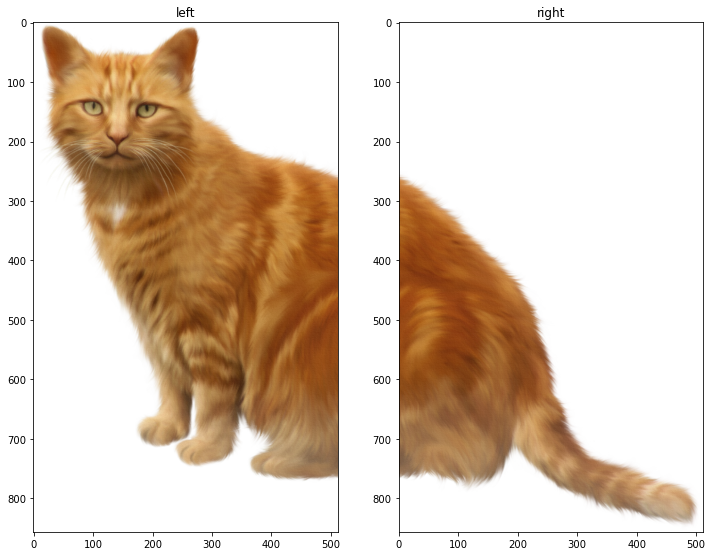

In [83]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(p1)
plt.title("left")

plt.subplot(122)
plt.imshow(p2)
plt.title('right')

#### 拼接

In [92]:
mer_img=np.zeros((row,col,4),np.uint8)

In [93]:
mer_img[:,:int(col/2),:]=p1
mer_img[:,int(col/2):,:]=p2

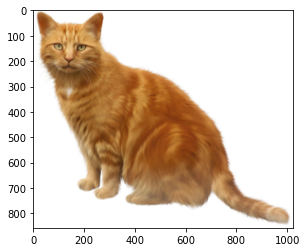

In [95]:
plt.imshow(mer_img)

#### 缩放

In [96]:
img=mer_img

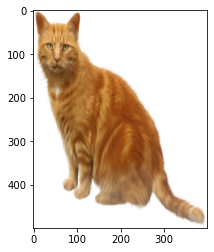

In [101]:
plt.imshow(cv2.resize(img,(400,500)))

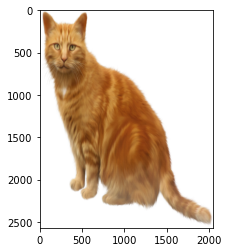

In [104]:
plt.imshow(cv2.resize(img,None,fx=2,fy=3))

#### 翻转

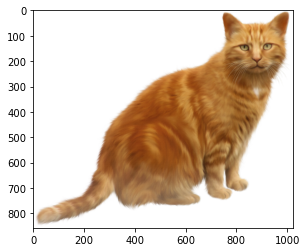

In [110]:
plt.imshow(cv2.flip(img,1))

#### 平移

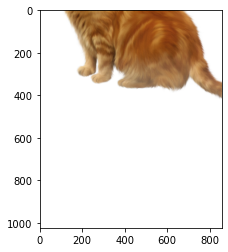

In [121]:
M=np.array([[1,0,0],[0,1,-400]],dtype=np.float32)
plt.imshow(cv2.warpAffine(img,M,(row,col)))

## 二值化处理

(512, 512)


(512, 512, 3)

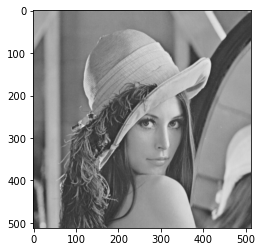

In [128]:
img=cv2.imread('lena.jpg',0)
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [129]:
ret,th=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

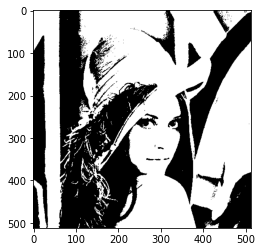

In [132]:
plt.imshow(th)

In [133]:
cv2.threshold?

## 归一化

In [134]:
img=np.asarray(Image.open("lena.jpg"))

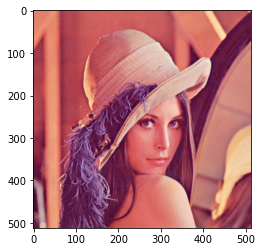

In [136]:
plt.imshow(img)

In [138]:
import paddle

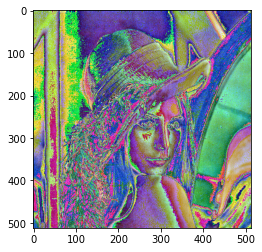

In [142]:
mean=[0.31169346,0.25506335,0.12432463]
std=[0.34042713,0.29819837,0.1375536]
normalized_img=paddle.vision.transforms.normalize(img,mean,std,data_format='HWC')

normalized_img=Image.fromarray(np.uint8(normalized_img))
plt.imshow(normalized_img)

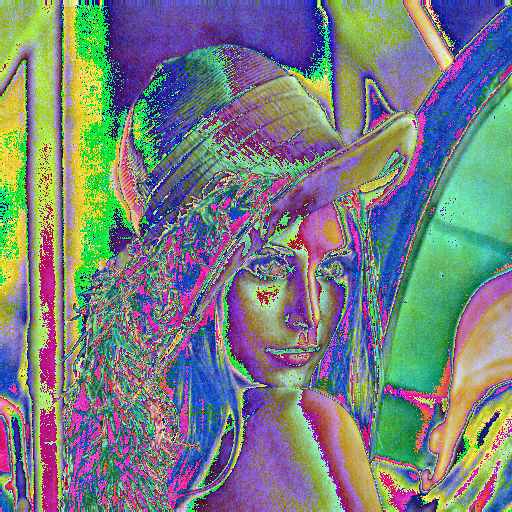

In [143]:
normalized_img

In [144]:
normalized_img.save("normalized_img.jpg")